In [12]:
import os
import numpy as np
import datetime as DT

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

## Set pandas printout options, for better look
pd.set_option('display.max_row', 15)
pd.set_option('display.max_columns', 15)
pd.set_option('expand_frame_repr', False)
pd.set_option('max_colwidth', 60)

## Set train data root path
root_path = os.path.abspath(os.path.join(os.path.dirname('__file__'), '../..'))

df = pd.read_csv()

## Change birthdate format, so we can calculate age of every related id
df['birthdate'] = df['birthdate'].apply('{:06}'.format)
df['birthdate'] = pd.to_datetime(df['birthdate'], format='%m%d%y')

rep_var=['','N-A'] #variable replace

## Clear all NaN Value, so become more readable
df = df.replace(np.nan, rep_var[1], regex=True)

## Create new copy of prior DataFrame and
##  Select only appropriate column
##    and filter empty `topic_id`
df_filter = df.loc[(df['topic_id'] != '') & (df['city'] != '') & (df['os'] != ''), \
    ['user_id','gender','birthdate','event','event_time','city','browser','os','device'\
    ,'carrier','manufacturer','duration','topic_id','article_id']]

now = pd.Timestamp(DT.datetime.now())

## Calculate Age, by subtracting variable now(which is current date) and birtdate
df_filter['birthdate'] = df_filter['birthdate'].where(df_filter['birthdate'] < now, df_filter['birthdate'] -  np.timedelta64(100, 'Y'))
df_filter['birthdate'] = (now - df_filter['birthdate']).astype('<m8[Y]')

df_filter.head(5) # get top 5

,user_id,gender,birthdate,event,event_time,city,browser,os,device,carrier,manufacturer,duration,topic_id,article_id
0,1026349329,male,21.0,read_article,2017-03-07 06:56:59,Jakarta,N-A,Android,N-A,TELKOMSEL,OnePlus,N-A,"22553543,522681656,41566010,46170458,1027266267",1028322564
1,1035461267,male,28.0,read_article,2017-04-26 21:14:18,Surabaya,Chrome,Android,Android,N-A,N-A,N-A,"143865906,27432949,98040676,52353894,1035581805",1036034482
2,701987221,male,62.0,article_comment,2017-05-23 18:07:11,Jakarta,N-A,Android,N-A,TELKOMSEL,LENOVO,N-A,N-A,N-A
3,771752788,male,25.0,spent_time,2017-02-23 07:43:15,Jakarta,N-A,Android,N-A,TELKOMSEL,samsung,N-A,"361858614,46904429,91265302,27428266",1009162668
4,765731006,female,21.0,spent_time,2017-03-10 19:45:39,Jakarta,N-A,Android,N-A,TELKOMSEL,OPPO,N-A,N-A,1032594876


In [2]:
print "Total Unique User: ", len(df_filter[['user_id']].groupby('user_id').size())

Total Unique User:  11711


* * *

**Discovering relationships** between variables is the fundamental goal of data analysis.

> Frequency tables are a basic tool you can use to explore data and get an idea of the relationships between variables.

A frequency table is just a data table that shows the counts of one or more categorical variables.

Frequency tables are a simple yet effective tool for **exploring relationships between variables that take on few unique values**, however, still require you to inspect numerical values and proportions closely and it is not always easy to quickly convey insights drawn from tables to others.

Creating plots is a way to visually investigate data, which takes advantage of our innate ability to process and detect patterns in images.

## All unique user_id X City X OS

In [133]:
## grup berdasar unique user_id, karena setiap row pada data asli berupa perulangan user_id yang sama
filtered_os_city = df_filter[['user_id','city','os','browser']].loc[(df_filter['city']!='N-A') & \
                                                                    (df_filter['os']!='N-A') & \
                                                                    (df_filter['browser']!='N-A')].groupby(['user_id','city','os','browser']).size().to_frame()

filtered_os_city.index.names = ['user_id','city','os','browser']
filtered_os_city.reset_index(inplace=True)
filtered_os_city = filtered_os_city.rename(columns= {0: 'count'})

filtered_os_city

,user_id,city,os,browser,count
0,1000040055,Jakarta,Android,Chrome,21
1,1000323911,Medan,Windows,Chrome,6
2,1000631138,Bandung,iOS,Mobile Safari,4
3,1000631389,Semarang,iOS,Mobile Safari,14
4,1000631389,Surabaya,iOS,Mobile Safari,9
5,1000647687,Jakarta,Android,Chrome,1
6,1000647687,Jakarta,Windows,Chrome,3
...,...,...,...,...,...
9507,999104574,Jakarta,iOS,Mobile Safari,5
9508,999738226,Jakarta,Android,Chrome,3


In [135]:
# Resample with city count > ncity
ncity = 100
filtered_oscity = filtered_os_city[['city','os','browser']].groupby('city').filter(lambda x: len(x) > ncity)
filtered_oscity

,city,os,browser
0,Jakarta,Android,Chrome
1,Medan,Windows,Chrome
2,Bandung,iOS,Mobile Safari
3,Semarang,iOS,Mobile Safari
4,Surabaya,iOS,Mobile Safari
5,Jakarta,Android,Chrome
6,Jakarta,Windows,Chrome
...,...,...,...
9507,Jakarta,iOS,Mobile Safari
9508,Jakarta,Android,Chrome


In [136]:
# Lets view the data
list(set(filtered_os_city[['city']].groupby('city').filter(lambda x: len(x) > ncity)['city']))

['Surabaya',
 'Bogor',
 'Jakarta',
 'Semarang',
 'Yogyakarta',
 'Bandung',
 'Sangereng',
 'Bekasi',
 'Medan']

In [138]:
cxt_cityos = pd.crosstab(index=filtered_oscity['city'],  # Make a crosstab
                         columns=filtered_oscity['os'], margins=True)
cxt_cityos

os,Android,BlackBerry,Linux,Mac OS X,Windows,Windows Phone,iOS,All
city,,,,,,,,
Bandung,298,1,7,21,210,3,29,569
Bekasi,86,0,0,15,100,1,18,220
Bogor,101,0,1,12,55,1,13,183
Jakarta,2968,7,41,245,1390,29,331,5011
Medan,67,0,2,1,115,2,6,193
Sangereng,111,0,1,17,105,2,19,255
Semarang,79,0,6,5,94,0,12,196
Surabaya,560,2,12,53,248,2,58,935
Yogyakarta,61,0,8,17,139,0,6,231


In [141]:
# Variable sanity check
citysel = 'Jakarta'
ossel = 'Android'
print "Sanity check for City: %s and OS: %s , has Count: %d"%(citysel, ossel, \
                                                              len(df_filter[['user_id','city','os','browser']].loc[(df_filter['city']==citysel) & \
                                                                                                                   (df_filter['os']==ossel) & \
                                                                  (df_filter['browser']!='N-A')].groupby(['user_id','city','os','browser']).size()
                                                                 )
                                                             )


Sanity check for City: Jakarta and OS: Android , has Count: 2968


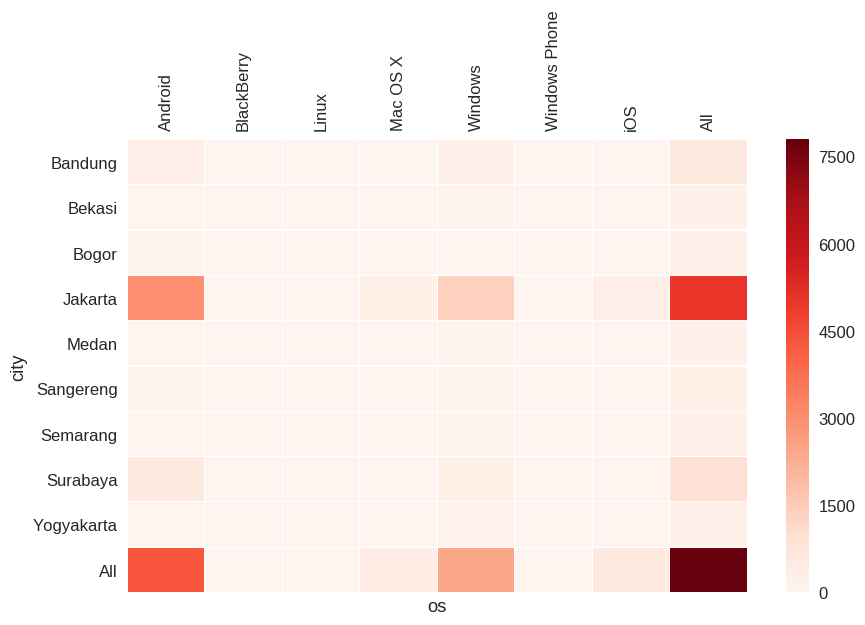

In [140]:
# set appropriate font and dpi
sns.set(font_scale=1.2)
sns.set_style({"savefig.dpi": 100})
# plot it out
axuncity = sns.heatmap(cxt_cityos, cmap=plt.cm.Reds, linewidths=.1)
# set the x-axis labels on the top
axuncity.xaxis.tick_top()
# rotate the x-axis labels
plt.xticks(rotation=90)
# get figure (usually obtained via "fig,ax=plt.subplots()" with matplotlib)
figuncity = axuncity.get_figure()
# specify dimensions and save
figuncity.set_size_inches(10, 6)
figuncity.show()

In [142]:
# Do NOT stop there, we can even add more dimensions, say we interested what kind of fav Browser in every OS used
filtered_browsercity_os = df_filter[['user_id','browser']].loc[df_filter['browser']!='N-A'].groupby(['user_id','browser']).size().to_frame()
filtered_browsercity_os.index.names=['user_id','browser']
filtered_browsercity_os.reset_index(inplace=True)

cxt_cityos_browser = pd.crosstab(index=filtered_oscity['city'],  # Make a crosstab
                                 columns=[filtered_oscity['os'],
                                          filtered_oscity['browser']])

cxt_cityos_browser

os                Android              BlackBerry  Linux                   ...   Windows            Windows Phone                       iOS                                      
browser    Android Mobile Chrome Opera BlackBerry Chrome Firefox Mozilla   ...     Opera Internet Explorer Mobile Microsoft Edge Chrome iOS Facebook Mobile Mobile Safari Mozilla
city                                                                       ...                                                                                                   
Bandung                14    278     6          1      4       3       0   ...         2                        3              0          2               6            21       0
Bekasi                  3     82     1          0      0       0       0   ...         3                        1              0          0               4            13       1
Bogor                   5     95     1          0      0       1       0   ...         0                        1              0          1               2            10       0
Jakarta               128   2782    58          7     28       8       4   ...        26                       17             12          7             108           199      17
Medan                   3     60     4          0      0       2       0   ...         1                        1              1          0               1             5       0
Sangereng               2    107     2          0      1       0       0   ...         1                        1              1          0               5            14       0
Semarang                4     73     2          0      3       2       1   ...         1                        0              0          1               4             7       0
Surabaya               41    503    16          2      7       3       2   ...         8                        0              2          2              18            32       6
Yogyakarta              2     59     0          0      6       1       1   ...         6                        0              0          0               2             4       0

[9 rows x 23 columns]

In [148]:
# Remember always sanity check your variable weight

# Variable sanity check
citysel = 'Jakarta'
ossel = 'Android'
browsel = 'Opera'
print "Sanity check for City: %s and OS: %s and Browser: %s, has Count: %d"%(citysel, ossel, browsel, \
                                                              len(df_filter[['user_id']].loc[(df_filter['browser']==browsel) & \
                                                                                             (df_filter['city']==citysel) & \
                                                                 (df_filter['os']==ossel)].groupby(['user_id']))
                                                             )

Sanity check for City: Jakarta and OS: Android and Browser: Opera, has Count: 58


## Manufacturer X Gender

In [15]:
ldf_manufac = list(df_filter[['manufacturer']].loc[(df_filter['manufacturer']!='N-A')].groupby('manufacturer').size().nlargest(7).reset_index()['manufacturer'])

print "list of 7 highest manufacturer:\n", ldf_manufac

list of 7 highest manufacturer:
['Apple', 'Xiaomi', 'samsung', 'OPPO', 'asus', 'LENOVO', 'Sony']


In [162]:
genman = df_filter[['user_id','gender','manufacturer']].loc[(df_filter['manufacturer'].isin(ldf_manufac))].groupby(['user_id','gender','manufacturer']).size().to_frame()
genman.index.names=['user_id','gender','manufacturer']
genman.reset_index(inplace=True)

genman

,user_id,gender,manufacturer,0
0,1000548159,male,Apple,210
1,1000570617,male,Xiaomi,6
2,1000607531,female,Xiaomi,608
3,1000934985,male,samsung,66
4,1001341258,male,Apple,76
5,1001934100,male,Sony,218
6,1001991684,male,samsung,124
...,...,...,...,...
2968,997753687,male,samsung,42
2969,998057189,male,samsung,2


In [163]:
cxt_gender_manufac = pd.crosstab(index=genman.gender,  # Make a crosstab
                                 columns=genman.manufacturer)

cxt_gender_manufac

manufacturer,Apple,LENOVO,OPPO,Sony,Xiaomi,asus,samsung
gender,,,,,,,
female,168,25,103,9,76,41,203
male,460,123,297,58,515,221,672
other,1,0,1,0,0,0,2


In [168]:
# Variable sanity check
gendsel = 'female'
manusel = 'Apple'
print "Sanity check for Gender: %s and Manufacturer: %s , has Count: %d"%(gendsel, manusel, \
                                                                             len(df_filter[['user_id','manufacturer']].loc[(\
                                                                                    df_filter['manufacturer']==manusel) & \
                                                                                      (df_filter['gender']==gendsel)].groupby(['user_id','manufacturer']).size())
                                                                             )

Sanity check for Gender: female and Manufacturer: Apple , has Count: 168


In [31]:
from collections import defaultdict
genders=defaultdict(list)
for idx, rows in cxt_gender_manufac.iterrows():
    print idx
    for row in rows:
        genders[idx].append(row)

genders

female
male
other


defaultdict(list,
            {'female': [128, 25, 88, 18, 111, 53, 190],
             'male': [486, 121, 305, 49, 463, 198, 666],
             'other': [1, 0, 1, 0, 0, 0, 0]})

/root/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


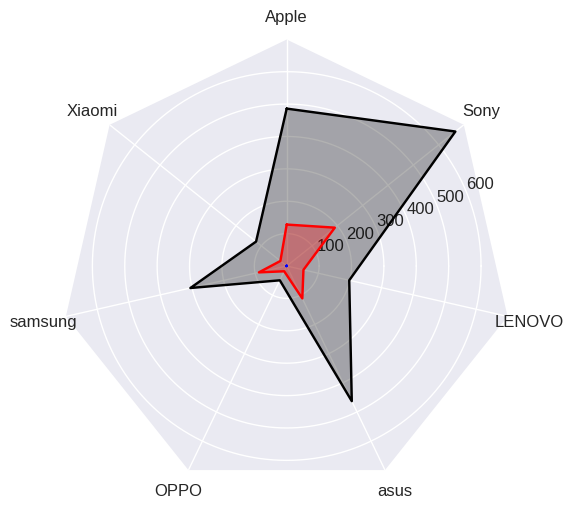

In [32]:
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection

def _radar_factory(num_vars):
    theta = 2*np.pi * np.linspace(0, 1-1./num_vars, num_vars)
    theta += np.pi/2

    def unit_poly_verts(theta):
        x0, y0, r = [0.5] * 3
        verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
        return verts

    class RadarAxes(PolarAxes):
        name = 'radar'
        RESOLUTION = 1

        def fill(self, *args, **kwargs):
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(theta * 180/np.pi, labels)

        def _gen_axes_patch(self):
            verts = unit_poly_verts(theta)
            return plt.Polygon(verts, closed=True, edgecolor='k')

        def _gen_axes_spines(self):
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            verts.append(verts[0])
            path = Path(verts)
            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta

def radar_graph(labels = [], male = [], female = [],  other = []):
    N = len(labels) 
    theta = _radar_factory(N)
    #max_val = max(max(optimum), max(values))
    fig = plt.figure(figsize=(6,6), dpi=120)
    
    ax = fig.add_subplot(1, 1, 1, projection='radar')
    ax.plot(theta, male, color='k')
    ax.plot(theta, female, color='r')
    ax.plot(theta, other, color='b')
    
    # Fill area
    ax.fill(theta, male, 'k', alpha=0.3)
    ax.fill(theta, female, 'r', alpha=0.3)
    ax.fill(theta, other, 'b', alpha=0.3)
    
    ax.set_varlabels(labels)
    plt.legend()
    plt.show()


labels = ldf_manufac
male = genders['male']
female = genders['female']
other = genders['other']

radar_graph(labels, male, female, other) 